# Appendix: Additional Reading 

This appendix section contains additional information which will deepen your understanding. However, it is not examinable and is completely optional reading.


## A1: Log-likelihood ratios

So far we have used the MLE to find an estimate of a parameter. Typically, the estimate is computed from a sample, so if we were to _sample again_ we would expect the estimate to vary a little. But what about others values; what steps are involved to compare other estimates to the MLE? How much would the sample estimates vary? The **log-likelihood ratio (LLR)** is a useful approach. The LLR gives a measure of consistency of a value of $\theta$ relative to the most likely value.

The LLR is defined as,

$$ log\frac{L(\theta)}{L(\hat\theta)} $$

where $L(\theta)$ is the likelihood evaluated at any value, and $L(\hat\theta)$ is the likelihood evaluated at the MLE.

Alternatively, and especially when evaluating in software, the following is used;

$$ LLR(\theta) = l(\theta)-l(\hat\theta) $$

Let's explore the LLR and its properties with an small example.  

For a simple coin-flipping example, from a trial of 10 coin-flips, 4 were heads ($X=4$) and the remainder were tails. From this experiment, we know that the MLE (ie. $\hat\theta$) is 0.4, but we also want to use the LLR to compare other estimates of $\theta$. Looking at the LLR graphically we note that the LLR is a negative value, the further away from zero the less consistent the parameter value with to the MLE.

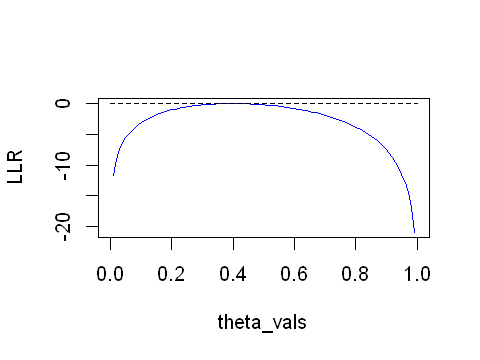

In [1]:
options(repr.plot.width=4, repr.plot.height=3)
 x <- 4; n<-10
 theta_vals <- seq(0,1,0.01)
 LLR <- dbinom(x,n,theta_vals,log=T)-dbinom(x,n,x/n,log=T)
 plot(theta_vals,LLR,type='l',col='blue')
# add additional things
lines(x=theta_vals,y=rep(0,length(theta_vals)),lty=2)

In the above experiment, for a _fair_ coin it would not be unusual to observe 4 heads from 10 trials. The MLE is 0.4 but we _know_ for a fair coin that the true parameter $\pi$ will be 0.5. The MLE is a *sample* of the distribution for $\pi$. So let's zoom in on the figure previously generated;

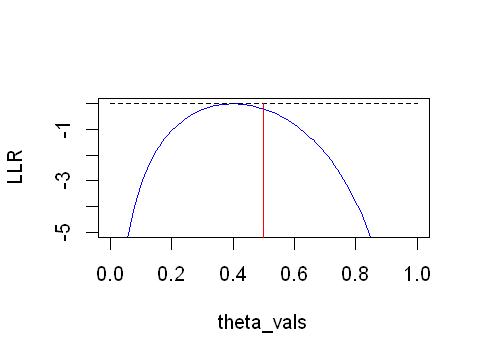

In [2]:
options(repr.plot.width=4, repr.plot.height=3)
 x <- 4; n<-10
 theta_vals <- seq(0,1,0.01)
 LLR <- dbinom(x,n,theta_vals,log=T)-dbinom(x,n,x/n,log=T)
 plot(theta_vals,LLR,type='l',col='blue',ylim=c(-5,0.01))
# add additional things
lines(x=theta_vals,y=rep(0,length(theta_vals)),lty=2)
lines(x=rep(0.5,2),y=c(-10,0.01),col='red',lty=1)

We can see in the figure (red line) that when $\theta=0.5$ the LLR is very close to 0. Values of $\theta$ further away from the MLE than 0.5 will have a even lower LLR. So we can make qualitative statements using the LLR in relation to the MLE. 

Let's increase the sample size and observe what happens to the LLR.

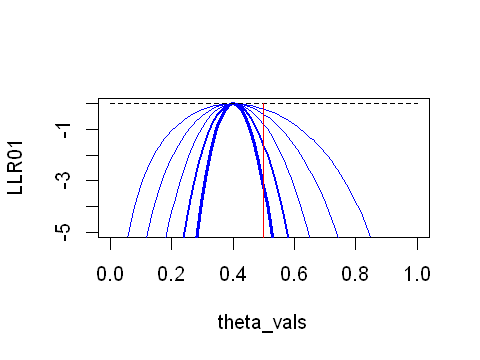

In [3]:
options(repr.plot.width=4, repr.plot.height=3)
 ns<-c(10,20,40,80,160)
# assume we have an 'unfair coin' with heads being more likely than tails
# rather than taking a random sample, assume a sample consistent with the null hypothesis - this is so the MLE remains 0.5
 x1<-round(ns[1]*0.4,0)
 x2<-round(ns[2]*0.4,0)
 x3<-round(ns[3]*0.4,0)
 x4<-round(ns[4]*0.4,0) 
 x5<-round(ns[5]*0.4,0) 
 theta_vals <- seq(0,1,0.01)
 LLR01 <- dbinom(x1,ns[1],theta_vals,log=T)-dbinom(x1,ns[1],x1/ns[1],log=T)
 LLR02 <- dbinom(x2,ns[2],theta_vals,log=T)-dbinom(x2,ns[2],x2/ns[2],log=T)
 LLR03 <- dbinom(x3,ns[3],theta_vals,log=T)-dbinom(x3,ns[3],x3/ns[3],log=T)
 LLR04 <- dbinom(x4,ns[4],theta_vals,log=T)-dbinom(x4,ns[4],x4/ns[4],log=T)
 LLR05 <- dbinom(x5,ns[5],theta_vals,log=T)-dbinom(x5,ns[5],x5/ns[5],log=T)
 plot(theta_vals,LLR01,type='l',col='blue',lwd=0.5,ylim=c(-5,0.01))
# compare to large sample sizes
 lines(theta_vals,LLR02,col='blue',lwd=1)
 lines(theta_vals,LLR03,col='blue',lwd=1.5)
lines(theta_vals,LLR04,col='blue',lwd=2)
lines(theta_vals,LLR05,col='blue',lwd=2.5)
lines(x=theta_vals,y=rep(0,length(theta_vals)),lty=2)
lines(x=rep(0.5,2),y=c(-10,0.01),col='red',lty=1)

At smaller sample sizes the LLR is slightly left skewed when the sample mean is 0.4. As the sample size increases you can see that the LLR becomes more symmetrical about the sample mean, and that the slope of the LLR at values away from the sample mean is steeper. We can start to see the relationship between sample size and the precision of the sample mean. Qualitatively, if we wanted to test whether the coin was fair, it is clear that a larger sample would enable us to have more confidence in our assessment.

Returning to the fact that the data are a sample from a population distribution, we can explore what happens when multiple samples of the same size are drawn. MLE is a sample of the true parameter we can perform the above experiment multiple times and identify the parameters space where the LLR will be zero.

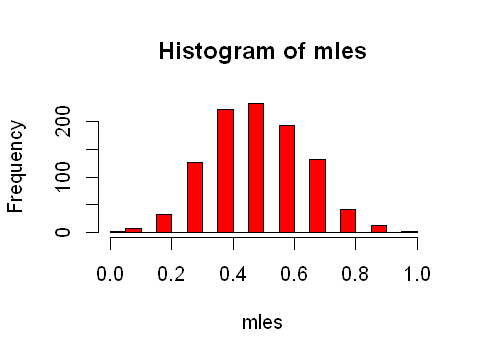

In [4]:
options(repr.plot.width=4, repr.plot.height=3)
 x <- 4; n<-10
 sampl <- rbinom(n=1000,size=n,prob=0.5)
mles <- sampl/n 
 hist(mles,col="red",breaks=30)

From the histogram above you can see that repeating the experiment (different samples) will return different values of the MLE and corresponding LLR. The LLR ratio can be used to assess how consistent different values of the parameter are with the MLE. 

The principles behind the LLR also relate to construction of confidence intervals, an issue which we will return to when we meet logistic regression and other models estimated using maximum likelihood estimation. 